# <center>Transform the data to get Normal Distribution</center>

### Modules

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

### Initializing the dataframe

In [2]:
df = pd.read_csv('Cars.csv')
df.head()

,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.isnull().sum()

carname              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase           11
carlength            0
carwidth            20
carheight           15
curbweight           0
enginetype           0
cylindernumber       0
enginesize          20
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                0
dtype: int64

In [4]:
df.describe(include='O')

,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [5]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,194.000000,205.000000,185.000000,190.000000,205.000000,185.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.669588,174.049268,65.932973,53.738947,2555.565854,124.081081,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,5.934168,12.337289,2.113143,2.470452,520.680204,38.528771,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.200000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,110.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,101.800000,183.100000,66.600000,55.575000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.shape

(205, 24)

### Methods of checking the Normality of the data

The vaious methods to check the Normality of the data are:  

- Skewness  
- Distribution Plot, which is the combination of histogram and KDE plot 
- Q-Q plot, which plots two sets of quantiles against one another  

#### Skewness value for each feature

In [7]:
df.select_dtypes(include='number').skew()

wheelbase           1.042888
carlength           0.155954
carwidth            0.880519
carheight           0.028922
curbweight          0.681398
enginesize          1.881727
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

<b>Skewness Criteria</b>   
-0.5 to 0.5 : Normally Skewed  
0.5 to 1 : Moderately Positively Skewed  
greater than 1: Highly Positively Skewed  
-0.5 to -1 : Moderately Negatively Skewed  
less than 1: Highly Negatively Skewed  

#### Distribution Plot - Histogram + KDEplot

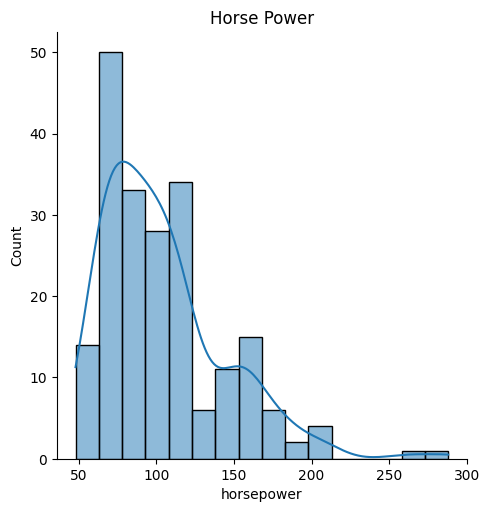

In [8]:
sns.displot(data=df['horsepower'], kde=True)
plt.title('Horse Power')
plt.show()

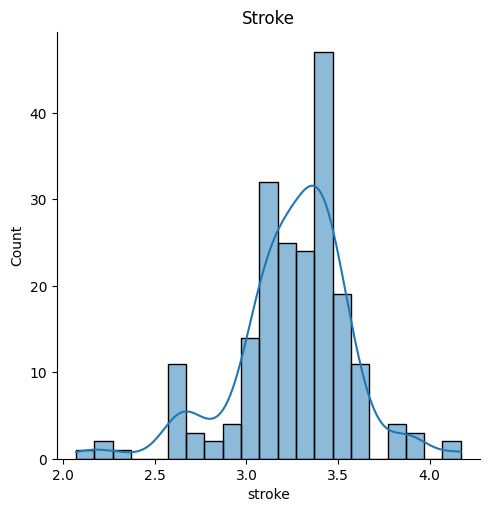

In [9]:
sns.displot(data=df['stroke'], kde=True)
plt.title('Stroke')
plt.show()

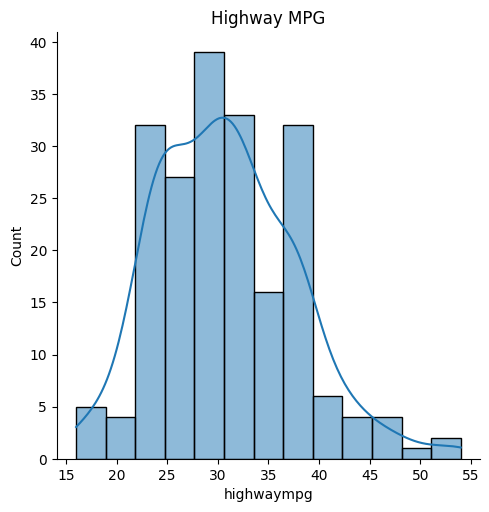

In [10]:
sns.displot(data=df['highwaympg'], kde=True)
plt.title('Highway MPG')
plt.show()

#### Q-Q Plot

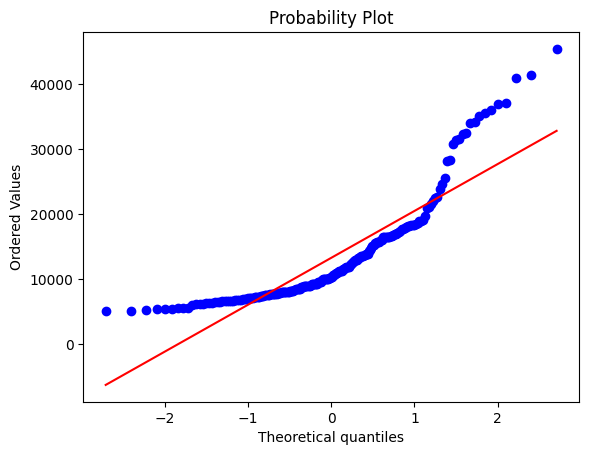

In [18]:
stats.probplot(df['price'], plot=pylab)
plt.show()

Since the scatterplot doesnt follow the straight line (45 degree), the feature 'Price' doesnot follow Normal Distribution.

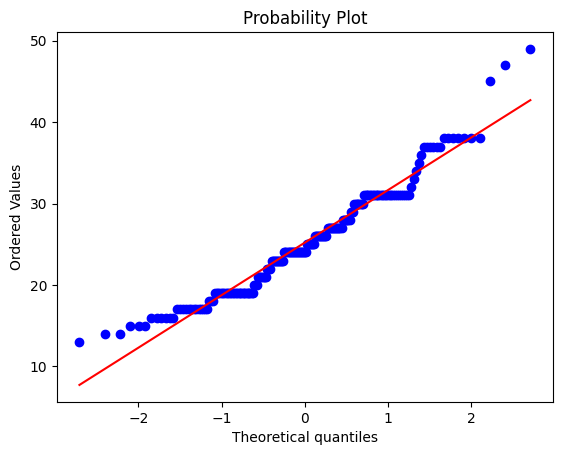

In [22]:
#create Q-Q plot with 45-degree line added to plot
stats.probplot(df['citympg'], plot=pylab)
plt.show()

Since the scatterplot roughly follows the straight line (45 degree), the feature 'Price' doesnot follow Normal Distribution.

### Transforming the data into Normal Distribution

The vaious methods to transform the General Distribution to Normal Distribution are:
- Log Transformation
- Square-root Transformation
- Reciprocal Transformation
- Exponential Transformation
- Box-Cox Transformation

In [45]:
def normality(data, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.kdeplot(data[feature])
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], plot=pylab)
    plt.show()

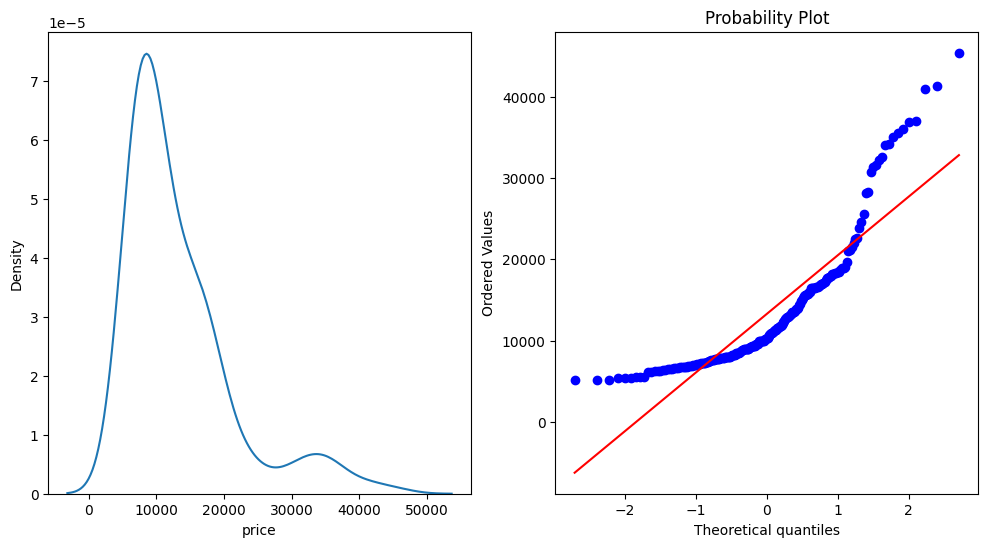

In [47]:
normality(df, 'price')

#### Log Transformation

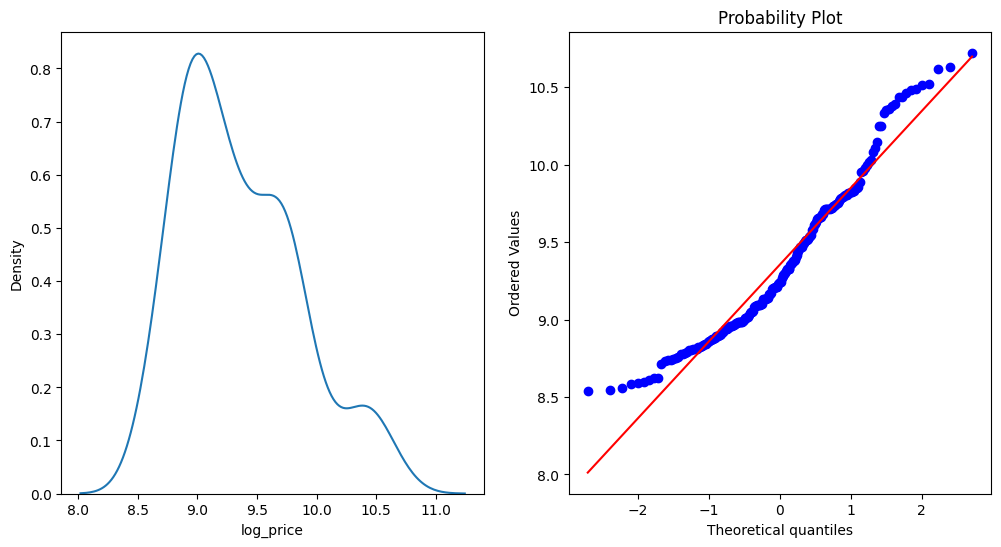

In [48]:
df['log_price'] = np.log(df['price'])
normality(df, 'log_price')

#### Reciprocal Transformation

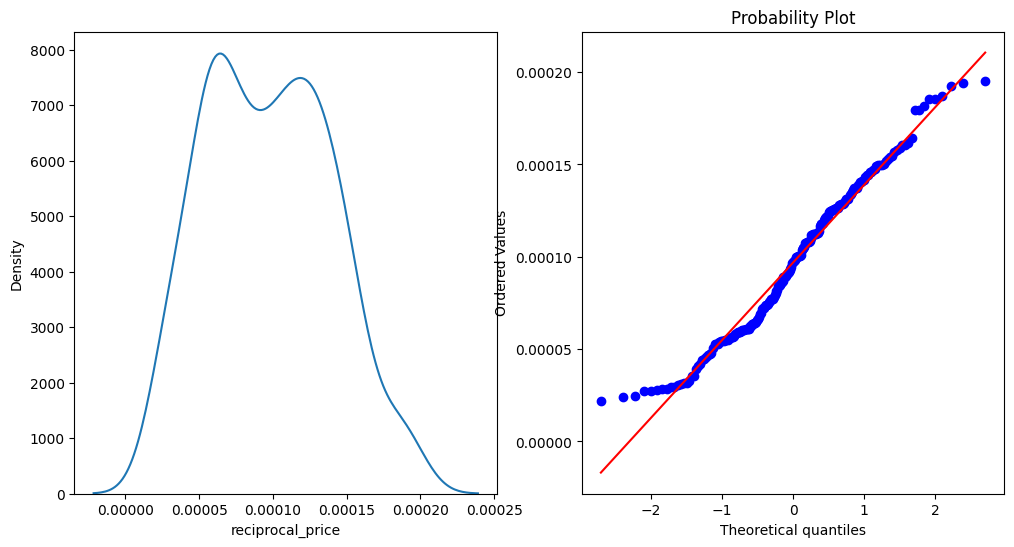

In [50]:
df['reciprocal_price'] = 1 /df['price']
normality(df, 'reciprocal_price')

#### Square-root Transformation

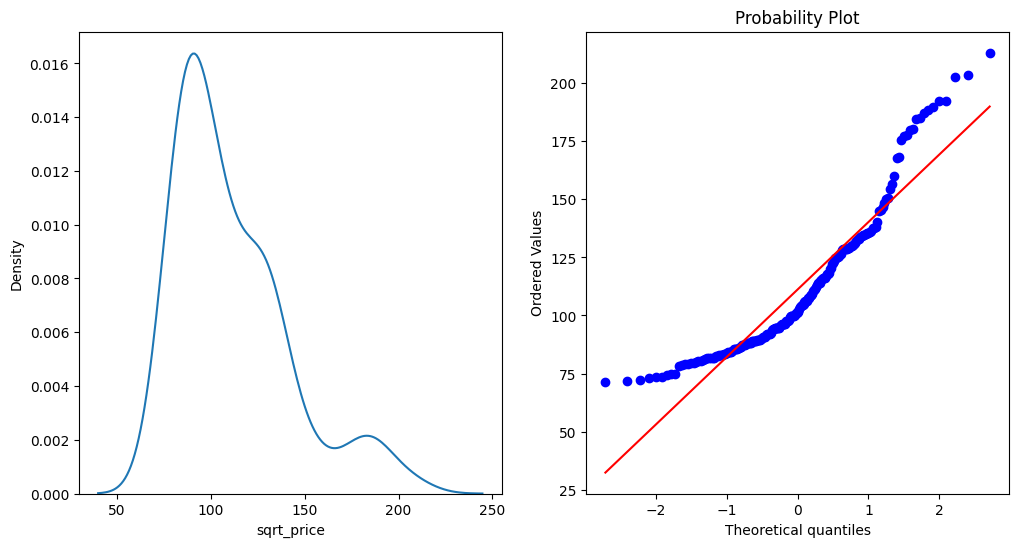

In [51]:
df['sqrt_price'] = np.sqrt(df['price'])
normality(df, 'sqrt_price')

#### Exponential Transformation

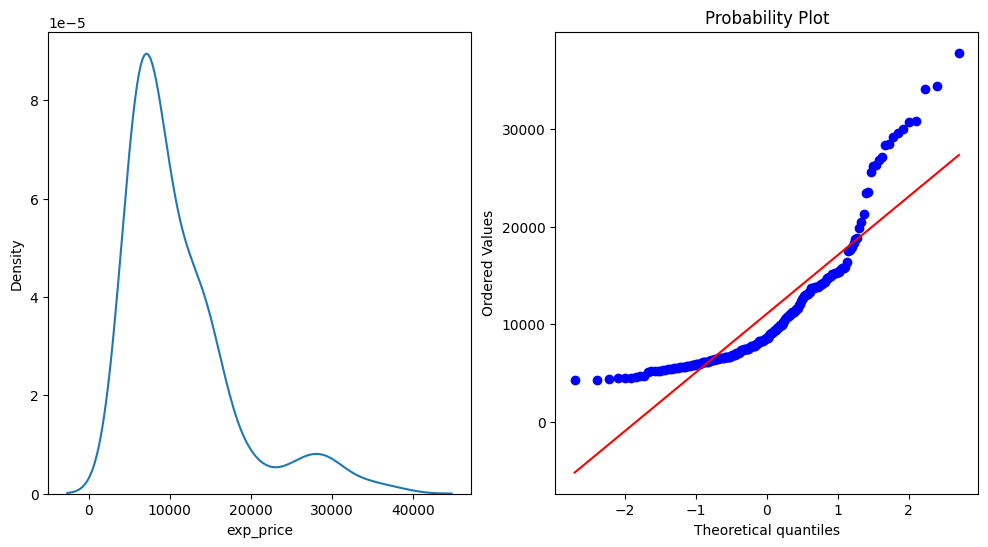

In [53]:
df['exp_price'] = df['price']**1/1.2 # np.exp(df['price']) ??
normality(df, 'exp_price')

#### Box-Cox Transformation

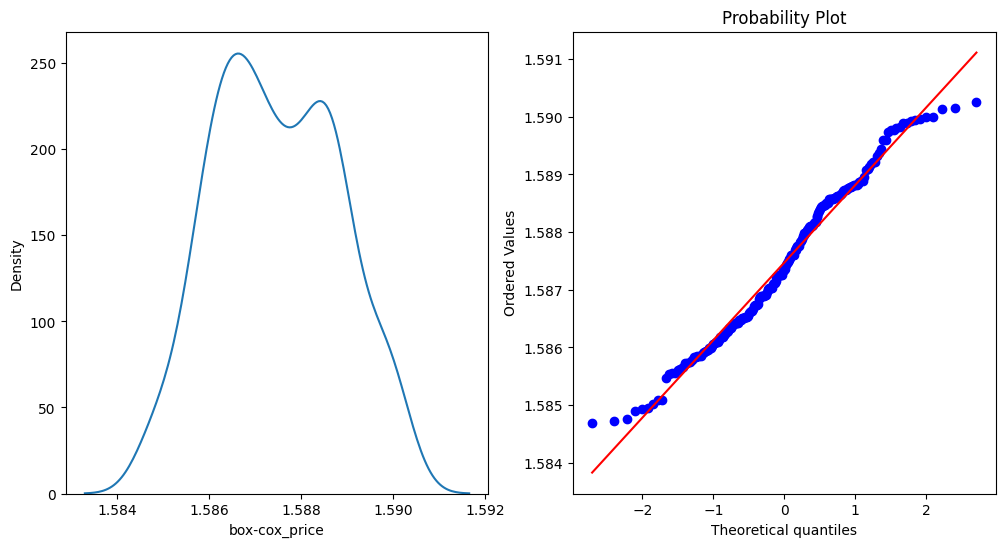

In [54]:
df['box-cox_price'], parameters = stats.boxcox(df['price'])
normality(df, 'box-cox_price')